In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

df = pd.read_csv('dataset.csv')

In [2]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

M    211
H    142
L    127
Name: Class, dtype: int64


/home/gfteixeira/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


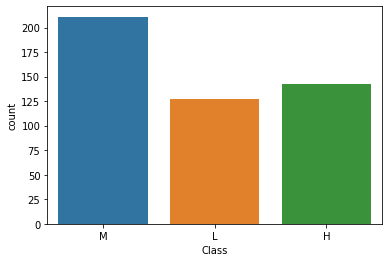

In [4]:
sns.countplot(df['Class'])
print(df.Class.value_counts())

In [5]:
df2 = df.copy()

df2['raisedhands'] = pd.cut(df2.raisedhands, bins=3, labels=np.arange(3), right=False)
df2.groupby(['raisedhands'])['Class'].value_counts(normalize=True)

raisedhands  Class
0            L        0.534314
             M        0.392157
             H        0.073529
1            M        0.577778
             H        0.288889
             L        0.133333
2            H        0.543011
             M        0.424731
             L        0.032258
Name: Class, dtype: float64

In [6]:
df2.groupby(['StudentAbsenceDays'])['Class'].value_counts(normalize=True)

StudentAbsenceDays  Class
Above-7             L        0.607330
                    M        0.371728
                    H        0.020942
Under-7             M        0.484429
                    H        0.477509
                    L        0.038062
Name: Class, dtype: float64

In [7]:
df2['Discussion'] = pd.cut(df2.Discussion, bins=3, labels=np.arange(3), right=False)
df2.groupby(['Discussion'])['Class'].value_counts(normalize=True)

Discussion  Class
0           M        0.416290
            L        0.371041
            H        0.212670
1           M        0.538462
            H        0.253846
            L        0.207692
2           H        0.480620
            M        0.379845
            L        0.139535
Name: Class, dtype: float64

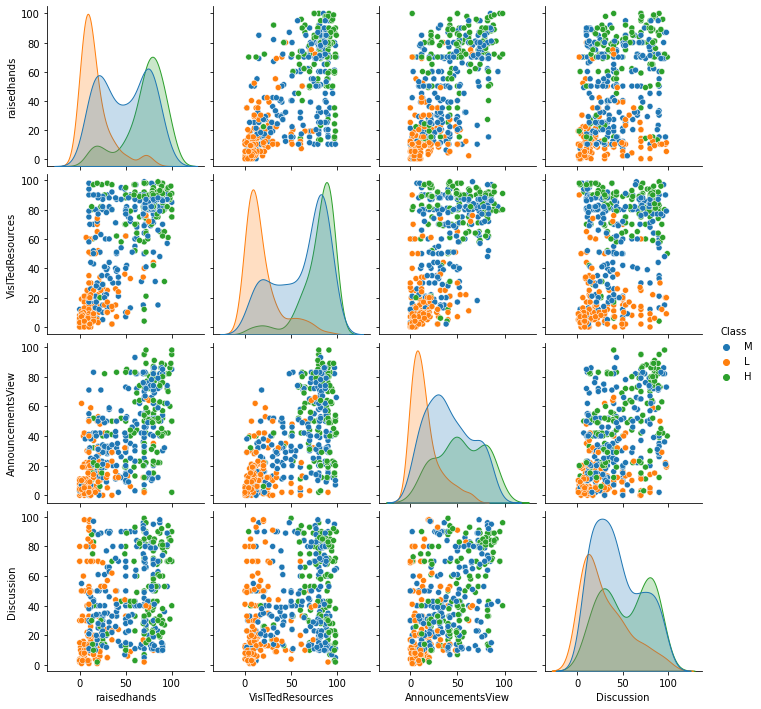

In [8]:
sns.pairplot(df, hue='Class')

In [9]:
df['gender'].replace('M', 0,inplace=True)
df['gender'].replace('F', 1,inplace=True)
df['Class'].replace('L', 0,inplace=True)
df['Class'].replace('M', 1,inplace=True)
df['Class'].replace('H', 2,inplace=True)
#y = df['Class']
# df.drop(['Class'], axis=1,inplace=True)
df.drop(['PlaceofBirth'], axis=1, inplace=True)
data_encoded = pd.get_dummies(df)
# data_encoded['Class'] = y
data_encoded

data_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   gender                         480 non-null    int64
 1   raisedhands                    480 non-null    int64
 2   VisITedResources               480 non-null    int64
 3   AnnouncementsView              480 non-null    int64
 4   Discussion                     480 non-null    int64
 5   Class                          480 non-null    int64
 6   NationalITy_Egypt              480 non-null    uint8
 7   NationalITy_Iran               480 non-null    uint8
 8   NationalITy_Iraq               480 non-null    uint8
 9   NationalITy_Jordan             480 non-null    uint8
 10  NationalITy_KW                 480 non-null    uint8
 11  NationalITy_Lybia              480 non-null    uint8
 12  NationalITy_Morocco            480 non-null    uint8
 13  NationalITy_Palestin

In [10]:
corr_mat = data_encoded.corr(method='spearman')
corr_mat['Class'].sort_values(ascending=False)


Class                            1.000000
StudentAbsenceDays_Under-7       0.669285
VisITedResources                 0.663749
raisedhands                      0.649348
AnnouncementsView                0.545724
ParentAnsweringSurvey_Yes        0.434084
Relation_Mum                     0.402435
ParentschoolSatisfaction_Good    0.375335
Discussion                       0.317983
gender                           0.263439
NationalITy_Iraq                 0.177682
NationalITy_Palestine            0.131177
Topic_Biology                    0.128009
Semester_S                       0.125954
GradeID_G-06                     0.122283
NationalITy_lebanon              0.097902
NationalITy_SaudiArabia          0.086954
StageID_MiddleSchool             0.078290
Topic_Geology                    0.064987
GradeID_G-11                     0.061892
NationalITy_Jordan               0.060873
NationalITy_venzuela             0.059724
Topic_English                    0.053789
NationalITy_USA                  0

In [11]:
y = data_encoded['Class']
data_encoded.drop(['Class'], axis=1,inplace=True)
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   gender                         480 non-null    int64
 1   raisedhands                    480 non-null    int64
 2   VisITedResources               480 non-null    int64
 3   AnnouncementsView              480 non-null    int64
 4   Discussion                     480 non-null    int64
 5   NationalITy_Egypt              480 non-null    uint8
 6   NationalITy_Iran               480 non-null    uint8
 7   NationalITy_Iraq               480 non-null    uint8
 8   NationalITy_Jordan             480 non-null    uint8
 9   NationalITy_KW                 480 non-null    uint8
 10  NationalITy_Lybia              480 non-null    uint8
 11  NationalITy_Morocco            480 non-null    uint8
 12  NationalITy_Palestine          480 non-null    uint8
 13  NationalITy_SaudiAra

# Logistic Regression

In [12]:
Features = data_encoded.copy()
Label = y.copy()

In [13]:
scaler = StandardScaler()
scaler.fit(Features)
scaled = scaler.transform(Features)

In [14]:
X = scaled
y = Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
logisticRegression = LogisticRegression(C=1,max_iter=200,multi_class='auto',random_state=1)
logisticRegression.fit(X_train,y_train)
Lrpred = logisticRegression.predict(X_test)

Logistic Regression

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.78      0.79      0.78        48
           2       0.75      0.68      0.71        22

    accuracy                           0.78        96
   macro avg       0.78      0.77      0.78        96
weighted avg       0.78      0.78      0.78        96



Confusion matrix


<AxesSubplot:>

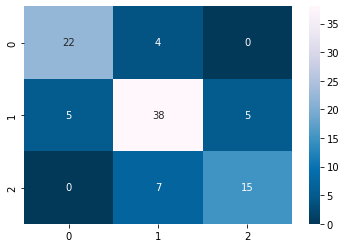

In [16]:
print('Logistic Regression' + '\n')
print(classification_report(y_test,Lrpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,Lrpred),cmap='PuBu_r',annot=True,fmt='g')

# Xgboost

In [17]:
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100,seed=10, use_label_encoder=False)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.82      0.83      0.82        48
           2       0.85      0.77      0.81        22

    accuracy                           0.82        96
   macro avg       0.83      0.82      0.82        96
weighted avg       0.82      0.82      0.82        96



Confusion matrix


<AxesSubplot:>

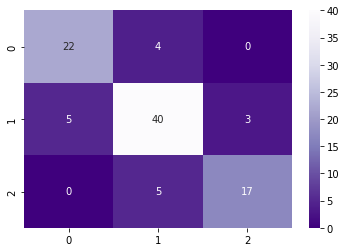

In [18]:
print(classification_report(y_test, y_pred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test, y_pred),cmap='Purples_r',annot=True,fmt='g')

# K-medoids

In [19]:
pca = PCA(n_components=2).fit_transform(data_encoded)
pca

array([[-65.27290566,  -5.43373864],
       [-58.02426066,  -3.09555126],
       [-71.62191713,   7.58646287],
       [-45.38055958,   2.8170716 ],
       [-16.75795691,   5.62495272],
       [-21.41213151,  31.59537969],
       [-58.02583487,  -9.2116403 ],
       [-42.22740241,  -3.93423525],
       [-48.66041915,  21.48046733],
       [ 30.67758824,   9.10600378],
       [ 29.29340472,  17.89064965],
       [-63.61943236,  -6.89098   ],
       [-83.7647091 ,  -6.34026112],
       [-59.33574082,  -4.89250331],
       [ 25.73650111,   7.5990289 ],
       [-19.25490786,  26.520874  ],
       [-18.70681113,  42.16147219],
       [ -8.28847341,  57.56746769],
       [  3.24940005,  60.48629581],
       [ 27.8599194 ,  49.2049649 ],
       [ 22.29634869,  37.44607868],
       [-51.95903299,  50.78778245],
       [-41.56479323,  55.18299724],
       [-73.65908145,  29.60269291],
       [-67.211706  ,  47.05348929],
       [-56.03230923,  20.50150944],
       [-44.68791572,  13.59745582],
 

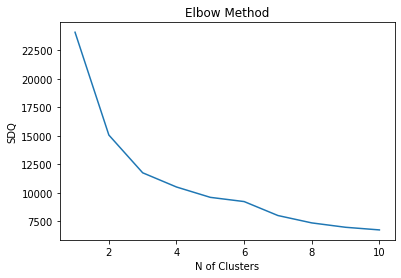

In [20]:
sdq = []  # soma das distancias quadradas
 
for i in range(1, 11):
    kmedoids_test = KMedoids(n_clusters=i,init='k-medoids++',max_iter=300,random_state=0)
    kmedoids_test.fit(pca)
    #print (i,kmeans.inertia_)
    sdq.append(kmedoids_test.inertia_)  
plt.plot(range(1, 11), sdq)
plt.title('Elbow Method')
plt.xlabel('N of Clusters')
plt.ylabel('SDQ') #within cluster sum of squares
plt.show()

In [21]:
kmedoids = KMedoids(n_clusters=3,init='k-medoids++',max_iter=300,random_state=0)
label = kmedoids.fit_predict(pca)
 
print(label)

[0 0 0 0 0 0 0 0 0 2 2 0 0 0 1 0 0 0 2 2 2 0 0 0 0 0 0 0 1 1 2 0 0 0 0 0 0
 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0 1 1 0 0 0 0 0 0 0 1 2 0 0 0 0 2 1 0 0 0 0 0
 0 1 1 1 0 2 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 2 0 0 0 0 2 1 0 0 0 0 0 1 0 1 1
 2 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 2 2 2 1 2 2 0 1 1 1 0 1 2 1
 1 2 2 2 2 0 1 2 1 1 1 2 2 2 1 2 1 2 1 2 1 0 1 1 0 0 1 0 1 1 1 0 2 1 2 0 0
 1 0 1 2 1 0 0 2 2 1 0 2 2 0 1 2 1 0 0 0 1 1 0 0 2 1 1 1 0 0 0 0 1 2 1 1 1
 1 2 2 1 0 0 2 0 0 0 0 1 1 0 0 2 2 2 2 2 0 0 2 1 2 2 1 1 0 1 2 0 2 0 2 2 2
 1 0 2 0 1 1 2 1 1 0 0 1 1 0 0 2 2 0 1 1 1 1 1 2 2 0 0 2 2 2 2 0 0 2 2 2 2
 2 2 0 0 0 0 0 0 0 0 2 2 2 2 0 0 1 1 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 0 0 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 2 2 0 0 1 1 1 1 1 2 2 2 2 2 1 1 2 2 2 2 0
 0 1 1 1 1 2 2 0 0 2 2 2 2 1 1 1 1 2 2 1 1 0 0 1 2 2 2 1 1 1 1 1 1 1 1 2 2
 1 1 2 2 2 2 1 1 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 0 0 1 1 0 0]


In [22]:
medoids = kmedoids.cluster_centers_
medoids

array([[-51.71814792,   6.61105158],
       [ 19.83848105, -23.76418176],
       [ 59.07137963,  17.54076804]])

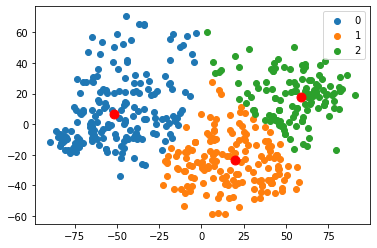

In [23]:
unique_labels = np.unique(label)
 
for i in unique_labels:
    plt.scatter(pca[label == i , 0] , pca[label == i , 1] , label = i)
plt.scatter(medoids[:,0] , medoids[:,1] , s = 80, color = 'red')
plt.legend()
plt.show()

In [24]:
kmedoids.medoid_indices_

array([ 27, 365, 461])

In [25]:
print(df.loc[ 27 , : ])
print(df.loc[ 461 , : ])
print(df.loc[ 365 , : ])

gender                                 0
NationalITy                           KW
StageID                     MiddleSchool
GradeID                             G-08
SectionID                              A
Topic                             Arabic
Semester                               F
Relation                          Father
raisedhands                           25
VisITedResources                      15
AnnouncementsView                     12
Discussion                            33
ParentAnsweringSurvey                 No
ParentschoolSatisfaction             Bad
StudentAbsenceDays               Above-7
Class                                  0
Name: 27, dtype: object
gender                                 0
NationalITy                         Iraq
StageID                     MiddleSchool
GradeID                             G-08
SectionID                              A
Topic                            Geology
Semester                               S
Relation                         

In [26]:
silhouette_avg = silhouette_score(pca, kmedoids.labels_)
silhouette_avg

0.4682573792839682

In [27]:
kmedoids.inertia_

11764.915866373445

In [28]:
C = label
R = y

RAND = rand_score(R,C)
print('RAND=',RAND)

RAND= 0.6397268615170494
